In [1]:
#import packages
import pandas as pd 
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

from PIL import Image
import requests
from io import BytesIO


from highlight_text import HighlightText, ax_text, fig_text
from datetime import date, datetime

In [2]:
#Import data 
df = pd.read_csv("/Users/maxtixador/Downloads/EH_gar_sk_stats_regular_2021-12-29.csv")
df.head()

,Player,Season,Team,Position,GP,TOI_All,EVO_GAR,EVD_GAR,PPO_GAR,SHD_GAR,Take_GAR,Draw_GAR,Off_GAR,Def_GAR,Pens_GAR,GAR,WAR,SPAR
0,Adam Erne,21-22,DET,L,30,425.8,-1.5,0.1,-0.4,0.0,0.9,-0.3,-1.9,0.1,0.6,-1.2,-0.2,-0.4
1,Adam Henrique,21-22,ANA,C,24,405.0,2.5,-0.5,0.5,0.0,0.5,-0.3,3.1,-0.5,0.3,2.8,0.5,1.0
2,Adam Lowry,21-22,WPG,C/L,30,461.0,-3.4,1.2,0.0,-0.1,0.5,0.6,-3.4,1.1,1.1,-1.3,-0.2,-0.4
3,Adrian Kempe,21-22,L.A,C/L,31,559.2,4.1,-2.8,-0.1,-1.0,-0.2,0.1,4.0,-3.7,-0.1,0.2,0.0,0.1
4,Aleksander Barkov,21-22,FLA,C,16,330.7,5.5,-0.4,-0.2,1.0,0.6,-0.1,5.3,0.6,0.4,6.4,1.1,2.2


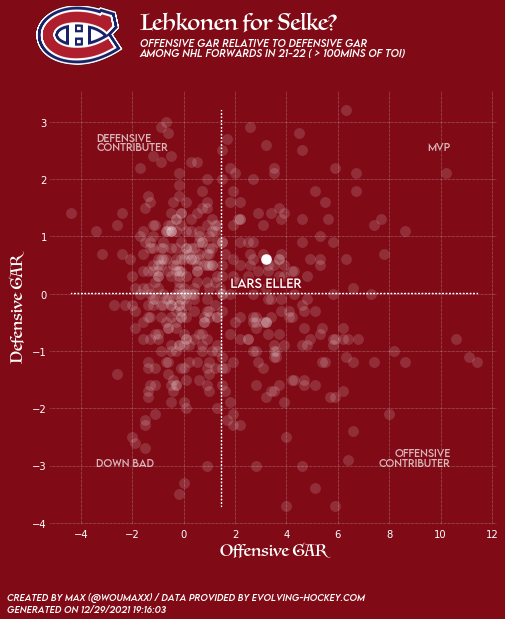

In [60]:
player = "Lars Eller"


title_font = "Luminari"
body_font = "LEMON MILK"
text_color = "w"
background = "#800a16"
filler = "w"
primary = "red"


mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)


x = df.Off_GAR.tolist()
y = df.Def_GAR.tolist()

x_mean = [np.mean(x)]*len(y)
y_mean = [np.mean(y)]*len(x)

x_mean_line = ax.plot(x_mean,y, label='Mean', linestyle=':', color = 'w', linewidth = 1.3)
y_mean_line = ax.plot(x,y_mean, label='Mean', linestyle=':', color = 'w', linewidth = 1.3)

ax.text(np.min(x)+1, np.min(y)+0.7, "Down bad", color=text_color,fontsize=10, ha="left", fontfamily=body_font, alpha=0.7)
ax.text(np.min(x)+1, np.max(y)-0.7, "Defensive\ncontributer", color=text_color,fontsize=10, ha="left", fontfamily=body_font, alpha=0.7)
ax.text(np.max(x)-1, np.min(y)+0.7, "Offensive\ncontributer", color=text_color,fontsize=10, ha="right", fontfamily=body_font, alpha=0.7)
ax.text(np.max(x)-1, np.max(y)-0.7, "MVP", color=text_color,fontsize=10, ha="right", fontfamily=body_font, alpha=0.7)


ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.15, lw=0.5, zorder=2)



x = df.loc[df['Player'] == player, 'Off_GAR']
y = df.loc[df['Player'] == player, 'Def_GAR']
t = player

ax.plot(x,y, zorder=3, color=text_color)

ax.scatter(x,y,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t = ax.text(x,y-0.5,t,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

fig.text(0.28,0.94, "Lehkonen for Selke?\n", fontweight="bold",fontsize=22, fontfamily=title_font,color=text_color)

fig.text(0.28,.94,"Offensive GAR relative to Defensive GAR\namong NHL forwards in 21-22 ( > 100mins of TOI)",fontweight="regular", style ="italic", fontsize=10,fontfamily=body_font, color=text_color)

ax.set_xlabel("Offensive GAR", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Defensive GAR", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)




spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right","bottom","left"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)




ax2 = fig.add_axes([0.1,0.90,0.15,0.15]) # badge
ax2.axis("off")
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Montreal_Canadiens.svg/2560px-Montreal_Canadiens.svg.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

today = date.today()
now = datetime.now()
time = now.strftime("%m/%d/%Y %H:%M:%S")

fig.text(0.05, -0.025, f"Created by Max (@woumaxx) / Data provided by evolving-hockey.com\nGenerated on {time}",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

#plt.savefig('lehselke.png', bbox_inches = "tight", dpi = 500)
plt.show()


In [1]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [43]:
print(df.loc[df['Player'] == player, 'iHF_60'])

10    10.64
Name: iHF_60, dtype: float64
